In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import requests


In [23]:
population = "population_data.csv"
population_df = pd.read_csv(population, encoding="utf-8")
city_t = population_df.iloc[:,2].str.strip()
state = population_df.iloc[:,3].str.strip()
city_state = city_t + ", " + state
population_df["City"] = city_state
population_df['Ave. Change'] = population_df['Ave. Change'].str.rstrip('%').astype('float')
population_df.head()



,Id,Id2,City,State,Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,2010 to 2011 change,Population Estimate (as of July 1) - 2012,2011 to 2012 change,Population Estimate (as of July 1) - 2013,...,2014 to 2015 change,Population Estimate (as of July 1) - 2016,2015 to 2016 change,Population Estimate (as of July 1) - 2017,2016 to 2017 change,Population Estimate (as of July 1) - 2018,2017 to 2018 change,Sum of Change,Ave. Change,Change from 2010 to 2018
0,1620000US2182272,2182272,"Wheelwright, Kentucky",Kentucky,1194,1202,0.67%,861,-28.37%,557,...,-1.64%,530,-1.85%,518,-2.26%,510,-1.54%,-71.74%,-8.97,-57.29%
1,1620000US1774457,1774457,"Tamms village, Illinois",Illinois,1041,1024,-1.63%,971,-5.18%,586,...,-4.36%,525,-4.37%,513,-2.29%,494,-3.70%,-63.22%,-7.90,-52.55%
2,1620000US4805732,4805732,"Bartlett, Texas",Texas,2710,2719,0.33%,2740,0.77%,2746,...,-0.04%,2726,-0.58%,1734,-36.39%,1742,0.46%,-35.33%,-4.42,-35.72%
3,1620000US1939900,1939900,"Jolley, Iowa",Iowa,39,38,-2.56%,27,-28.95%,27,...,0.00%,27,0.00%,26,-3.70%,26,0.00%,-35.22%,-4.40,-33.33%
4,1620000US1960420,1960420,"Ottosen, Iowa",Iowa,55,55,0.00%,42,-23.64%,42,...,-11.90%,37,0.00%,37,0.00%,37,0.00%,-35.54%,-4.44,-32.73%


In [21]:
population_df = population_df.rename(columns={"Population Estimate (as of July 1) - 2010": "(p) 2010",
                                             "Population Estimate (as of July 1) - 2011": "(p) 2011",
                                             "Population Estimate (as of July 1) - 2012": "(p) 2012",
                                             "Population Estimate (as of July 1) - 2013": "(p) 2013",
                                             "Population Estimate (as of July 1) - 2014": "(p) 2014",
                                             "Population Estimate (as of July 1) - 2015": "(p) 2015",
                                             "Population Estimate (as of July 1) - 2016": "(p) 2016",
                                             "Population Estimate (as of July 1) - 2017": "(p) 2017",
                                             "Population Estimate (as of July 1) - 2018": "(p) 2018"})
population_df.head(5)
                  



,Id,Id2,City,State,(p) 2010,(p) 2011,2010 to 2011 change,(p) 2012,2011 to 2012 change,(p) 2013,...,2014 to 2015 change,(p) 2016,2015 to 2016 change,(p) 2017,2016 to 2017 change,(p) 2018,2017 to 2018 change,Sum of Change,Ave. Change,Change from 2010 to 2018
0,1620000US2182272,2182272,"Wheelwright, Kentucky",Kentucky,1194,1202,0.67,861,-28.37,557,...,-1.64,530,-1.85,518,-2.26,510,-1.54,-71.74%,-8.97,-57.29%
1,1620000US1774457,1774457,"Tamms village, Illinois",Illinois,1041,1024,-1.63,971,-5.18,586,...,-4.36,525,-4.37,513,-2.29,494,-3.70,-63.22%,-7.90,-52.55%
2,1620000US4805732,4805732,"Bartlett, Texas",Texas,2710,2719,0.33,2740,0.77,2746,...,-0.04,2726,-0.58,1734,-36.39,1742,0.46,-35.33%,-4.42,-35.72%
3,1620000US1939900,1939900,"Jolley, Iowa",Iowa,39,38,-2.56,27,-28.95,27,...,0.00,27,0.00,26,-3.70,26,0.00,-35.22%,-4.40,-33.33%
4,1620000US1960420,1960420,"Ottosen, Iowa",Iowa,55,55,0.00,42,-23.64,42,...,-11.90,37,0.00,37,0.00,37,0.00,-35.54%,-4.44,-32.73%


In [4]:
meets_min = population_df.loc[population_df["(p) 2010"] > 100000, [
    "City", "State", "(p) 2010", "(p) 2011", "2010 to 2011 change", "(p) 2012", "2011 to 2012 change", "(p) 2013", 
    "2012 to 2013 change", "(p) 2014", "2013 to 2014 change", "(p) 2015", "2014 to 2015 change", "(p) 2016", "2015 to 2016 change",
    "(p) 2017", "2016 to 2017 change", "(p) 2018", "2017 to 2018 change",
    "Sum of Change", "Ave. Change", "Change from 2010 to 2018", "2010 to 2011 change", ]]
meets_min.head()

,City,State,(p) 2010,(p) 2011,2010 to 2011 change,(p) 2012,2011 to 2012 change,(p) 2013,2012 to 2013 change,(p) 2014,...,(p) 2016,2015 to 2016 change,(p) 2017,2016 to 2017 change,(p) 2018,2017 to 2018 change,Sum of Change,Ave. Change,Change from 2010 to 2018,2010 to 2011 change
2713,"Flint, Michigan",Michigan,101997,101207,-0.77,100185,-1.01,99427,-0.76,98565,...,97026,-0.75,96488,-0.55,95943,-0.56,-6.09%,-0.76,-5.94%,-0.77
2728,"Shreveport, Louisiana",Louisiana,200869,201746,0.44,201790,0.02,199923,-0.93,197740,...,194222,-1.16,191638,-1.33,188987,-1.38,-6.06%,-0.76,-5.92%,0.44
3325,"Detroit, Michigan",Michigan,711120,705043,-0.85,700159,-0.69,691883,-1.18,682669,...,676883,-0.36,674188,-0.40,672662,-0.23,-5.53%,-0.69,-5.41%,-0.85
3387,"Jackson, Mississippi",Mississippi,173738,175168,0.82,174845,-0.18,172943,-1.09,172030,...,169080,-1.09,166909,-1.28,164422,-1.49,-5.47%,-0.68,-5.36%,0.82
3646,"Erie, Pennsylvania",Pennsylvania,101724,101506,-0.21,101287,-0.22,100533,-0.74,99712,...,98239,-0.79,97313,-0.94,96471,-0.87,-5.28%,-0.66,-5.16%,-0.21


In [5]:
population_df_final = meets_min[["City", "(p) 2010", "(p) 2011", "(p) 2012", "(p) 2013", "(p) 2014", "(p) 2015", "(p) 2016", "(p) 2017", "(p) 2018", "Ave. Change"]]
population_df_final.head()



,City,(p) 2010,(p) 2011,(p) 2012,(p) 2013,(p) 2014,(p) 2015,(p) 2016,(p) 2017,(p) 2018,Ave. Change
2713,"Flint, Michigan",101997,101207,100185,99427,98565,97761,97026,96488,95943,-0.76
2728,"Shreveport, Louisiana",200869,201746,201790,199923,197740,196508,194222,191638,188987,-0.76
3325,"Detroit, Michigan",711120,705043,700159,691883,682669,679305,676883,674188,672662,-0.69
3387,"Jackson, Mississippi",173738,175168,174845,172943,172030,170943,169080,166909,164422,-0.68
3646,"Erie, Pennsylvania",101724,101506,101287,100533,99712,99024,98239,97313,96471,-0.66


In [6]:
population_df_final.nlargest(5, 'Ave. Change')

,City,(p) 2010,(p) 2011,(p) 2012,(p) 2013,(p) 2014,(p) 2015,(p) 2016,(p) 2017,(p) 2018,Ave. Change
19403,"Frisco, Texas",118192,123483,128403,136733,144878,154157,163841,177286,188170,5.99
19329,"McKinney, Texas",132943,137921,143506,149207,157139,163458,173336,181757,191645,4.68
19195,"Irvine, California",213392,220261,229083,236134,247283,255614,265721,276413,282572,3.57
19137,"Murfreesboro, Tennessee",109524,111716,113824,116872,120562,125585,131242,136103,141344,3.24
19098,"Midland, Texas",111284,113949,119830,124223,128446,133523,135019,136353,142344,3.13


In [22]:
frisco_df = population_df_final.loc[population_df_final["City"] == "Frisco, Texas",:]
Mckinney_df = population_df_final.loc[population_df_final["City"] == "McKinney, Texas",:]
irvine_df = population_df_final.loc[population_df_final["City"] == "Irvine, California",:]
murfreesboro_df = population_df_final.loc[population_df_final["City"] == "Murfreesboro, Tennessee",:]
midland_df = population_df_final.loc[population_df_final["City"] == "Midland, Texas",:]

top5 = [frisco_df,Mckinney_df,irvine_df,murfreesboro_df,midland_df]
top5_df = pd.concat(top5)
top5_df.head()
top5_df = top5_df.loc[:,~top5_df.columns.duplicated()]
top5_df.head()

,City,(p) 2010,(p) 2011,(p) 2012,(p) 2013,(p) 2014,(p) 2015,(p) 2016,(p) 2017,(p) 2018,Ave. Change
19403,"Frisco, Texas",118192,123483,128403,136733,144878,154157,163841,177286,188170,5.99
19329,"McKinney, Texas",132943,137921,143506,149207,157139,163458,173336,181757,191645,4.68
19195,"Irvine, California",213392,220261,229083,236134,247283,255614,265721,276413,282572,3.57
19137,"Murfreesboro, Tennessee",109524,111716,113824,116872,120562,125585,131242,136103,141344,3.24
19098,"Midland, Texas",111284,113949,119830,124223,128446,133523,135019,136353,142344,3.13


<Figure size 432x288 with 0 Axes>

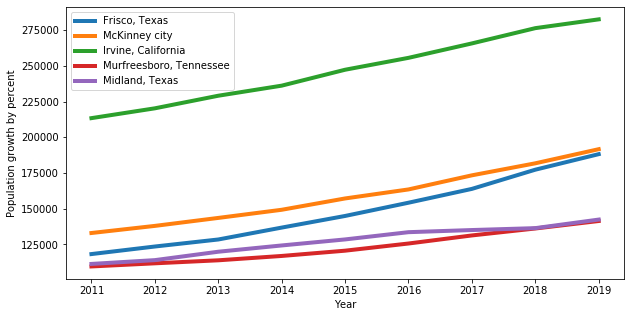

In [16]:

x_axis = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
#top5_percent = [year1_change,year2_change,year3_change,year4_change,year5_change,year6_change,year7_change,year8_change]
topfivecity = [top5_df["(p) 2010"],top5_df["(p) 2011"],top5_df["(p) 2012"],top5_df["(p) 2013"],top5_df["(p) 2014"],top5_df["(p) 2015"],top5_df["(p) 2016"],top5_df["(p) 2017"],
top5_df["(p) 2018"]]


plt.suptitle("Top 5 fastest growing cities (Min population 100k)", fontsize=15)

plt.figure(figsize=(10,5))
plt.plot(x_axis, topfivecity, linewidth=4, markersize=12)
plt.xlabel('Year')
plt.ylabel('Population growth by percent')
plt.legend(['Frisco, Texas','McKinney city','Irvine, California','Murfreesboro, Tennessee','Midland, Texas'], loc='best')
plt.savefig('top5line')
plt.show()



In [12]:
population_df_final.nsmallest(5, 'Ave. Change')

,City,(p) 2010,(p) 2011,(p) 2012,(p) 2013,(p) 2014,(p) 2015,(p) 2016,(p) 2017,(p) 2018,Ave. Change
2713,"Flint, Michigan",101997,101207,100185,99427,98565,97761,97026,96488,95943,-0.76
2728,"Shreveport, Louisiana",200869,201746,201790,199923,197740,196508,194222,191638,188987,-0.76
3325,"Detroit, Michigan",711120,705043,700159,691883,682669,679305,676883,674188,672662,-0.69
3387,"Jackson, Mississippi",173738,175168,174845,172943,172030,170943,169080,166909,164422,-0.68
3646,"Erie, Pennsylvania",101724,101506,101287,100533,99712,99024,98239,97313,96471,-0.66


In [18]:
flint_df = population_df_final.loc[population_df_final["City"] == "Flint, Michigan",:]
shreveport_df = population_df_final.loc[population_df_final["City"] == "Shreveport, Louisiana",:]
detroit_df = population_df_final.loc[population_df_final["City"] == "Detroit, Michigan",:]
jackson_df = population_df_final.loc[population_df_final["City"] == "Jackson, Mississippi",:]
erie_df = population_df_final.loc[population_df_final["City"] == "Erie, Pennsylvania",:]

btm5 = [flint_df,shreveport_df,detroit_df,jackson_df,erie_df]
btm_df = pd.concat(btm5)
btm_df
btm_df = btm_df.loc[:,~btm_df.columns.duplicated()]
btm_df

,City,(p) 2010,(p) 2011,(p) 2012,(p) 2013,(p) 2014,(p) 2015,(p) 2016,(p) 2017,(p) 2018,Ave. Change
2713,"Flint, Michigan",101997,101207,100185,99427,98565,97761,97026,96488,95943,-0.76
2728,"Shreveport, Louisiana",200869,201746,201790,199923,197740,196508,194222,191638,188987,-0.76
3325,"Detroit, Michigan",711120,705043,700159,691883,682669,679305,676883,674188,672662,-0.69
3387,"Jackson, Mississippi",173738,175168,174845,172943,172030,170943,169080,166909,164422,-0.68
3646,"Erie, Pennsylvania",101724,101506,101287,100533,99712,99024,98239,97313,96471,-0.66


<Figure size 432x288 with 0 Axes>

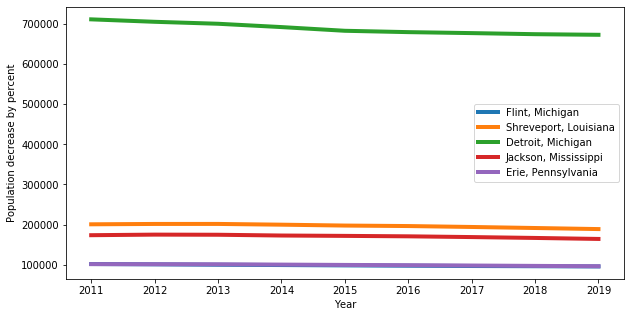

In [19]:
x_axis = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
#top5_percent = [year1_change,year2_change,year3_change,year4_change,year5_change,year6_change,year7_change,year8_change]
btmfivecity = [btm_df["(p) 2010"],btm_df["(p) 2011"],btm_df["(p) 2012"],btm_df["(p) 2013"],btm_df["(p) 2014"],btm_df["(p) 2015"],btm_df["(p) 2016"],btm_df["(p) 2017"],
btm_df["(p) 2018"]]


plt.suptitle("Top 5 fastest cities with a decrease in population (Min population 100k)", fontsize=15)

plt.figure(figsize=(10,5))
plt.plot(x_axis, btmfivecity, linewidth=4, markersize=13)
plt.xlabel('Year')
plt.ylabel('Population decrease by percent')
plt.legend(['Flint, Michigan','Shreveport, Louisiana','Detroit, Michigan','Jackson, Mississippi','Erie, Pennsylvania'], loc='best')
plt.savefig('btm5line')
plt.show()

